# Lab 7: Seismic Node Data Analysis

**Course:** UAF GEOS419 - Solid Earth Geophysics  
**Instructors**: Bryant Chow and Carl Tape  
**Date**: Apr. 15, 2025

-------

## Lab Learning Goals
1. Get a sense of what one day of seismic data looks like for a seismic node
2. Learn to identify signals from very near-station sources (footsteps, boot stomps, hammer hits)
3. Estimate seismic wavespeeds from travel times of direct waves
4. Become familiar with tools used to search through and visualize seismic data
5. Apply Fourier analysis to view different frequency components of signals
6. Build intuition about seismic signals and what they might represent

## Instructions
- Please work through the lab exercises below. Try to do all your work in this notebook.
- Run the `Import Cell` before starting in on the exercises, this will bring in necessary packages.
- Use `Code` cells for doing any math you need, and for plotting data, using Python.
- Use `Markdown` cells to write answers to questions.
- If you need a refresher on Python or Jupyter, or have questions on how to do something specific, see resources below or feel free to ask!

## Important Links
1. **Course Website:** https://bryantchow.com/teaching/geos419
2. **Nodes Lab Google Drive**: https://drive.google.com/drive/folders/1K6wQONjYCp3-tO41NxnGk1mnfjTYwT9U?usp=drive_link
3. **Nodes Lab Slides**: https://docs.google.com/presentation/d/1FElUjzTfrQmNdALEqTe2lE8pRRl3i8m3D3EmlkyE3pM/edit#slide=id.g34b953215db_0_12
4. **Node Dataset:** https://drive.google.com/drive/folders/16uPknP1pScar_1wBSRzTGFq6A7j7Yl_r?usp=drive_link

In [11]:
# IMPORT CELL - Please run this cell before proceeding
import numpy as np
import matplotlib.pyplot as plt
import obspy

# These are imported again in cell blocks below, but referenced here for convenience
from obspy import read, UTCDateTime

# Custom plotting routine for ObsPy time series
from geos419funcs import plot_waveforms

%matplotlib widget


------------


# 1: Obtaining Seismic Data
> **Node Data in Google Drive:** https://drive.google.com/drive/folders/16uPknP1pScar_1wBSRzTGFq6A7j7Yl_r?usp=drive_link
> 
- To grab data, please download from Google Drive and then upload from your computer to this OSL environment
- Filenames are formatted as: NN.SSS..CCc.YYYY.JJJ
  - N = Network
  - S = Station
  - [C = Channel Code ](https://ds.iris.edu/ds/nodes/dmc/data/formats/seed-channel-naming/) (Band, Instrument, Component)
  - Y = Year
  - J = Julian Day (Jan. 1 is 001)

This set of tasks will ask you to download and view some node data and identify an active source.

> **Tasks:** 
> 1. **Select**: The instructor will assign you one station to look at based on Station Number
> 2. **Download**: For your assigned station, download the data stream for the **Z component** on April 4, 2025
> 3. **Plot**: Plot the waveform data using the `plot_waveforms` function
> 4. **Identify**: Use the interactive figure to search for the hammer strikes in your data. Use the approximate time in the Lab Slides to confirm.
> 5. **Mark**: Use the `marks` function to place lines at where the hammer strike occurs on your waveform plot. Re-run the cell to see these appear.
> 6. **Log**: Determine the actual hammer hit time and write this down in the Deployment Information slide

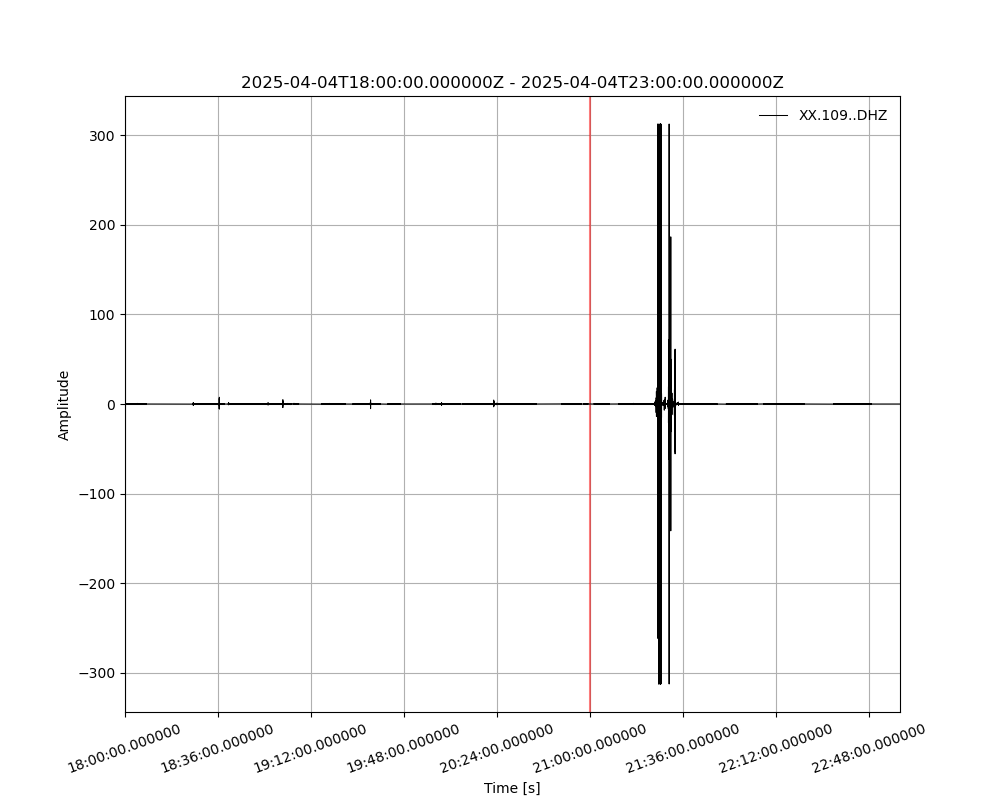

In [5]:
# Complete Task Below

# READ: Read in seismic data
# st =  read("") # <- YOUR INPUT HERE
st =  read("/Users/chow/Work/teaching/GEOS419_nodes_lab/DATA_2/XX.109..DHZ.2025.094") 


# MARKS: Use `marks` to add vertical lines to denote times of interest
marks = []
marks.append("2025-04-04T21:00:00")  # <- Copy-Paste this below to add more time marks. Time should be in UTC

# TRIM (OPTIONAL): If you want to only look at a time period of interest, you can modify below
time_start = "2025-04-04T18:00:00"
time_end = "2025-04-04T23:00:00"

# AXES (OPTIONAL): If you want to set regular tick marks, you can change this 
# Be careful, if the value is too small you won't be able to see your labels
tick_every = None  

# Do not modify below
st_trim = st.copy()
st_trim.trim(UTCDateTime(time_start), UTCDateTime(time_end))
plot_waveforms(st_trim, marks=marks, tick_every=tick_every)

### Questions
1. How did you determine what time to call the "strike"? Does this make sense compared to what the ground should be doing (remember that positive is up, negative is down)
2. How long is one of the "strike" signals? A hammer hit should be very impulsive, why do you think their is a finite-duration signal?
3. Do you notice anything about the characteristic of a strike signal with time? Does it look different over its duration?
4. What is the time separation (in seconds) between hammer strikes? Does this make sense compared with the video and how long you expect it to take to swing a sledgehammer?
5. Are there any pre-strike (less than half a second before the hit) signals? If so what do you think that might be?
6. Can you identify when I first arrived at the site? What are some signs that indicate I am nearby, working on the instrument, getting ready, etc.


---

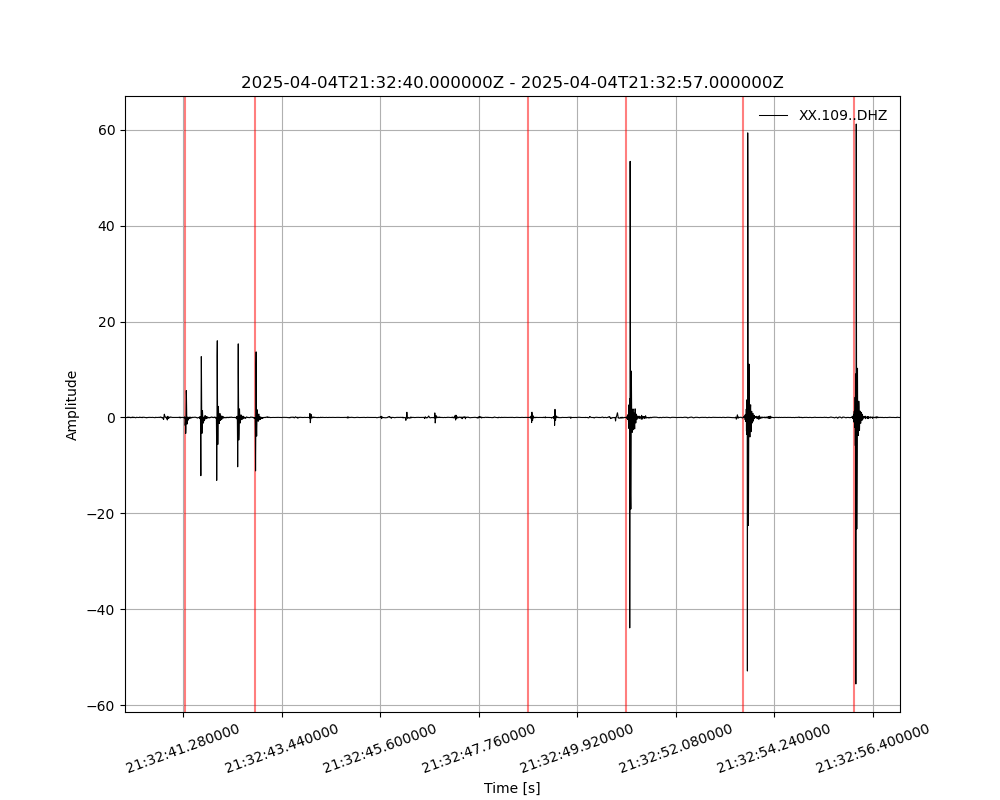

In [12]:
st =  read("/Users/chow/Work/teaching/GEOS419_nodes_lab/DATA_2/XX.109..DHZ.2025.094") 

# I did not ask the students to do this but I checked my timestamped video
# and tried to correlate each of the signals in the waveform with something
# happening in the video.
video_start = UTCDateTime("2025-04-04T21:32:25.665")
times = [15.655,  # First boot tap
         17.185,  # Last boot tap
         23.184,  # Ready hammer on strike plate
         25.331,  # First hammer hit
         27.895,  # Second hammer hit
         30.317,  # Third hammer hit
        ]
marks = [video_start + time for time in times]

# TRIM (OPTIONAL): If you want to only look at a time period of interest, you can modify below
time_start = "2025-04-04T21:32:40"
time_end = "2025-04-04T21:32:57"

# Do not modify below
st_trim = st.copy()
st_trim.trim(UTCDateTime(time_start), UTCDateTime(time_end))
plot_waveforms(st_trim, marks=marks)

---------

# 2: Spectrograms
- Remember that we can use the Fourier transform to look at the relative energy of different frequency components in our waveform. 
- [A spectrogram](https://docs.obspy.org/tutorial/code_snippets/plotting_spectrograms.html) shows us how frequency amplitudes vary with time
- The following task will have you look at spectrograms for the hammer hits to understand their frequency content

> **Tasks:**
> 1. Trim your waveforms for Station 1 and Station 2 to the **same start and end time**, directly around the 3 hammer hits
> 2. Plot the spectrogram for **both** of these waveforms to look at the frequency content with time.
> 3. Choose a non-default (not viridis) colormap by setting the `cmap` parameter (https://matplotlib.org/stable/users/explain/colors/colormaps.html)
> 4. Choose a colormap that you think better highlights the information shown in the spectrogram

In [ ]:
# Create new copies of your data to modify
st_trim_1 = st.copy()
st_trim_2 = st2.copy()

# Complete Tasks Below
# ...

st_trim_1.spectrogram(cmap="viridis")  # <- Change the colormap

### Questions
1. What dominant frequencies does a hammer hit put out its energy at
2. The spectrogram y-axis stops at 125 Hz. This is a hard limit called the Nyquist frequency and is a consequence of setting **what parameter** in our deployment?

---------

# 3: Filtering

- Remember that we can filter our signals to remove certain frequencies in order to retain signals of interest
- Let's filter our data to view the hammer strikes in different ways
> **Tasks:**
> 1. Play with the filter functions below and see what each does to your data
> 2. For each filtered waveform, plot the spectrogram to visualize the effect of the filter

In [ ]:
st_filter_highpass = st_trim_1.copy()
st_filter_highpass.filter("highpass", freq=60)
plot_waveforms(st_filter_highpass)

st_filter_lowpass = st_trim_1.copy()
st_filter_highpass.filter("lowpass", freq=1)
plot_waveforms(st_filter_lowpass)

st_filter_bandpass = st_trim_1.copy()
st_filter_bandpass.filter("bandpass", freqmin=80, freqmax=100)
plot_waveforms(st_filter_bandpass)

# Questions
1. What does a highpass filter do?
2. What does a lowpass filter do?
3. What does a bandpass filter do?
4. For the hammer strike data would you rather use a highpass or lowpass filter?

---------

# 4: Estimate Seismic Velocity

We can determine a rough velocity structure of the subsurface by looking at the hammer strike you found in 1, at a neighboring node location, and determining the speed required to cover the distance between the stations.

> **Tasks:**
> 1. Using the station map, select a neighboring station. We will call this Station 2 (Station 1 referring to the one you looked at in Part 1)  
> 2. Using Google Earth or Google Maps, determine the straight line distance between the two stations (in meters)
> 3. Grab vertical component data for Station 2.
> 4. Read in data from the station you identify in and identify the 3 hammer hits that occurred at Station 1.
> 5. You may need to filter your data to identify the arrivals.
> 6. Make a spectrogram of your trimmed data for Station 2.
> 7. Figure out the time difference between the hammer strike recorded at Station 1 and at Station 2. Think carefully about what part of the waveform you are calling the "arrival".
> 8. Answer the questions below.

In [ ]:
# Complete Task Below
st2 =  read()  # Please use `st2` to refer to Station 2 so that we do not overwrite `st`
# ...

### Questions
1. What is the velocity of the subsurface based on your time and distance? (in m/s)
2. Does this make sense? Is this faster or slower than you were expecting?
3. What phase is this (P or S; direct, reflected or head wave?)
4. Describe the trajectory this wave took to get from Station 1 to Station 2.
5. What type of material do you think hosted this wave, given the wavespeed you calculated, and the geographic condition at the ski field
6. How does the spectrogram for Station 2 compare to Station 1? What does this say about how frequencies are modulated as they propagate from Station 1 to 2?

# 5: Locate A Seismic Source
Let's look for other signals in our data that we can corroborate with known timings. Let's try to find one of these potential sources in the node data. 

> **TASKS:**
> 1. **Look at the Lab Slides** for the slide titled "Potential Sources". Choose a source to look for.
> 2. **Note down**  
>    a. Which source you will look for  
>    b. Which station(s) might have the best chance of capturing it, and  
>    c. The approximate time window you need to be looking at to detect this source  
> 4. **Trim** your waveform for a reasonable window around when you expect the source to be generating measurable signals.
> 5. **Plot** both the **time series** and the **spectrogram** for the trimmed waveform so you have multiple ways of viewing the data.
> 6. If necessary, **filter** your data to enhance the signal of interest.
> 7. See questions below after you try to find your source.
>

# 6. Search for Interesting Signals

If we have additional time, please scan through your waveforms and look for interesting signals! You now have the tools to view your data in different ways, which might help you visualize your signals better.

> **Tasks:**
> - Isolate any interesting looking signals and try to make a conjecture about what it's source is.
> - Base your answer on time of day, location of signal, frequency content, periodicity, whether or not it is captured on multiple stations, etc.
> - Once you have your hypothesis, see if you can find more of that signal!

# Reflection
Approximately how much time did you spend on this lab assignment? Did you finish the lab? If not, what problem and part number did you get to?
Feel free to suggest improvements here.